In [43]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

def standardize(col_dat):
    col_dat = col_dat.dropna()
    std_col = ( col_dat - np.mean(col_dat) )/ np.std(col_dat)
    return std_col

In [44]:
data = pd.read_csv('/data/member/twgoo/COVID-19/trajectory_analysis/oxford_globa.csv', index_col=0)

In [45]:
pre_country_code = set(data['CountryCode'])
print("Total number of countries :",len(pre_country_code))

Total number of countries : 40


In [46]:
data.describe()

,Days,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,ConfirmedCases,DailyConfirmed
count,7240.000000,4060.000000,3967.000000,4267.000000,3597.000000,2310.000000,3459.000000,3572.000000,6913.000000,3070.000000,6922.000000,6879.000000,6903.000000,5313.000000,6902.000000,6914.000000,6895.000000,6891.000000,6.658000e+03,6609.000000
mean,91.000000,0.880419,0.746471,0.875713,0.838477,0.691631,0.613544,0.768944,0.548040,0.689902,0.348021,0.231110,0.039852,0.971265,0.419009,0.509257,0.130329,0.044373,5.332776e+04,1158.799667
std,52.253011,0.165140,0.181796,0.178679,0.161089,0.207881,0.167888,0.179689,0.426912,0.195815,0.426360,1.448816,0.557333,0.095773,0.331129,0.395879,0.979893,0.550077,1.916719e+05,4055.068217
min,1.000000,0.250000,0.250000,0.333333,0.200000,0.333333,0.250000,0.333333,0.000000,0.333333,0.000000,-0.124939,0.000000,0.333333,0.000000,0.000000,-1.522879,0.000000,0.000000e+00,-2461.000000
25%,46.000000,0.750000,0.500000,0.666667,0.800000,0.666667,0.500000,0.666667,0.000000,0.666667,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.250000e+00,0.000000
50%,91.000000,1.000000,0.750000,1.000000,0.800000,0.666667,0.500000,0.666667,0.600000,0.666667,0.000000,0.000000,0.000000,1.000000,0.333333,0.500000,0.000000,0.000000,4.685000e+03,69.000000
75%,136.000000,1.000000,0.750000,1.000000,1.000000,0.666667,0.750000,1.000000,1.000000,0.666667,1.000000,0.000000,0.000000,1.000000,0.666667,1.000000,0.000000,0.000000,2.965050e+04,533.000000
max,181.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000,1.000000,12.291724,11.921350,1.000000,1.000000,1.000000,11.384533,9.143015,2.510323e+06,54771.000000


In [49]:
std_data = data.iloc[:,2:-2].apply(lambda x : standardize(x), axis=0)

In [50]:
std_data

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.283825,NaN,-0.816320,-0.159528,-0.07151,NaN,-1.265486,-1.286487,-0.133013,-0.080674
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.283825,NaN,-0.816320,-0.159528,-0.07151,NaN,-1.265486,-1.286487,-0.133013,-0.080674
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.283825,NaN,-0.816320,-0.159528,-0.07151,NaN,-1.265486,-1.286487,-0.133013,-0.080674
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.283825,NaN,-0.816320,-0.159528,-0.07151,NaN,-1.265486,-1.286487,-0.133013,-0.080674
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.283825,NaN,-0.816320,-0.159528,-0.07151,NaN,-1.265486,-1.286487,-0.133013,-0.080674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7232,-0.789846,-1.355925,-1.170089,-0.238886,-1.723939,-0.67641,-0.569267,1.058750,-0.118681,0.356483,-0.159528,-0.07151,0.300055,1.754703,-0.023384,-0.133013,-0.080674
7233,-0.789846,-1.355925,-1.170089,-0.238886,-1.723939,-0.67641,-0.569267,1.058750,-0.118681,0.356483,-0.159528,-0.07151,0.300055,1.754703,-0.023384,-0.133013,-0.080674
7234,-0.789846,-1.355925,-1.170089,-0.238886,-1.723939,-0.67641,-0.569267,1.058750,-0.118681,0.356483,-0.159528,-0.07151,0.300055,1.754703,-0.023384,-0.133013,-0.080674
7235,-0.789846,-1.355925,-1.170089,-0.238886,-1.723939,-0.67641,-0.569267,1.058750,-0.118681,0.356483,-0.159528,-0.07151,0.300055,1.754703,-0.023384,-0.133013,-0.080674


# Data pre-processing
## Problems
1. Negative new confirmers 
2. Days start from 2020-01-01 for all countries 

In [51]:
for country in pre_country_code : 
    sub_data = data[data['CountryCode'] == country]
    
    others_data = data[data['CountryCode'] != country]
#     if min(sub_data['DailyConfirmed'].dropna()) < 0 : 
# #     if min(sub_data['DailyConfirmed'].dropna()) < 0 or max(sub_data['DailyConfirmed'].dropna()) > 680 :
#         data = data[data['CountryCode'] != country]
#     else :
    print(min(sub_data['DailyConfirmed']), max(sub_data['DailyConfirmed']) )
    first_day = 0 
    for i in range(len(sub_data)):
        if sub_data.iloc[i,-1] > 0 :
            first_day = i
            break
    sub_data = sub_data.iloc[first_day:]
    for i in range(len(sub_data)):
        sub_data.iloc[i,1] = i + 1
    data = pd.concat([sub_data, others_data], axis=0)

nan nan
nan nan
0.0 5275.0
0.0 1385.0
0.0 1401.0
0.0 11656.0
0.0 6294.0
0.0 1143.0
0.0 2319.0
-148.0 6557.0
0.0 234.0
-2461.0 11536.0
0.0 1426.0
0.0 1390.0
0.0 267.0
0.0 899.0
0.0 425.0
0.0 6825.0
0.0 54771.0
0.0 48529.0
0.0 390.0
0.0 1335.0
nan nan
0.0 15141.0
0.0 2760.0
0.0 296.0
0.0 909.0
nan nan
-713.0 9181.0
0.0 611.0
0.0 1063.0
nan nan
0.0 2889.0
0.0 1169.0
nan nan
0.0 263.0
0.0 6288.0
-525.0 8719.0
nan nan
0.0 408.0


In [52]:
data.describe()

,Days,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,ConfirmedCases,DailyConfirmed
count,5457.000000,4032.000000,3947.000000,4263.000000,3593.000000,2310.000000,3455.000000,3571.000000,5130.000000,3070.000000,5139.000000,5096.000000,5120.000000,4801.000000,5119.000000,5131.000000,5112.000000,5108.000000,5.344000e+03,5308.000000
mean,70.162177,0.881324,0.747720,0.875909,0.838742,0.691631,0.613676,0.768972,0.718830,0.689902,0.468768,0.311971,0.051629,0.986045,0.537084,0.654161,0.173534,0.057517,6.644015e+04,1442.823474
std,41.868045,0.165353,0.181405,0.178648,0.160982,0.207881,0.167940,0.179706,0.352879,0.195815,0.433880,1.675831,0.637957,0.070149,0.285951,0.327599,1.129136,0.627196,2.119003e+05,4479.376494
min,1.000000,0.250000,0.250000,0.333333,0.200000,0.333333,0.250000,0.333333,0.000000,0.333333,0.000000,-0.124939,0.000000,0.333333,0.000000,0.000000,-1.522879,0.000000,1.000000e+00,-2461.000000
25%,35.000000,0.750000,0.500000,0.666667,0.800000,0.666667,0.500000,0.666667,0.600000,0.666667,0.000000,0.000000,0.000000,1.000000,0.333333,0.500000,0.000000,0.000000,1.055000e+03,19.000000
50%,69.000000,1.000000,0.750000,1.000000,0.800000,0.666667,0.500000,0.666667,0.800000,0.666667,0.500000,0.000000,0.000000,1.000000,0.666667,0.500000,0.000000,0.000000,9.147500e+03,169.500000
75%,103.000000,1.000000,0.875000,1.000000,1.000000,0.666667,0.750000,1.000000,1.000000,0.666667,1.000000,0.000000,0.000000,1.000000,0.666667,1.000000,0.000000,0.000000,4.308925e+04,789.250000
max,181.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000,1.000000,12.291724,11.921350,1.000000,1.000000,1.000000,11.384533,9.143015,2.510323e+06,54771.000000


In [66]:
country_code = set(data['CountryCode'])
print("Total number of countries :",len(country_code))
print("Filtered out countries because of negative new confirmers: ")
for country in pre_country_code:
    if country not in country_code :
        print(country)

Total number of countries : 40
Filtered out countries because of negative new confirmers: 


In [67]:
country_code

{'AFG',
 'AUS',
 'BEL',
 'BRA',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'COL',
 'CZE',
 'DEU',
 'DNK',
 'DOM',
 'ECU',
 'ESP',
 'FIN',
 'GBR',
 'IDN',
 'IRL',
 'IRN',
 'ITA',
 'JPN',
 'KOR',
 'LUX',
 'MEX',
 'MYS',
 'NLD',
 'NOR',
 'PAK',
 'PAN',
 'PHL',
 'PRT',
 'RUS',
 'SAU',
 'SGP',
 'SRB',
 'SWE',
 'THA',
 'TUR',
 'USA'}

# GEE with a policy variable 
## Model strucutre 
- y ~ intercept + policy_variable 
- y ~ intercept + days + policy_variable
- y ~ intercept + days + log(days) + policy_variable

In [68]:
columns = list(data.columns)
for i ,column in enumerate(columns) : 
    columns[i] = column.replace(' ', '').replace('/','')
data.columns = columns

In [69]:
columns

['CountryCode',
 'Days',
 'C1_Schoolclosing',
 'C2_Workplaceclosing',
 'C3_Cancelpublicevents',
 'C4_Restrictionsongatherings',
 'C5_Closepublictransport',
 'C6_Stayathomerequirements',
 'C7_Restrictionsoninternalmovement',
 'C8_Internationaltravelcontrols',
 'E1_Incomesupport',
 'E2_Debtcontractrelief',
 'E3_Fiscalmeasures',
 'E4_Internationalsupport',
 'H1_Publicinformationcampaigns',
 'H2_Testingpolicy',
 'H3_Contacttracing',
 'H4_Emergencyinvestmentinhealthcare',
 'H5_Investmentinvaccines',
 'ConfirmedCases',
 'DailyConfirmed']

In [70]:
# data = data[data['CountryCode']=='USA']
data = data[data['DailyConfirmed'] >= 0]

In [71]:
variables = data.columns[2:-2]

In [72]:
variables

Index(['C1_Schoolclosing', 'C2_Workplaceclosing', 'C3_Cancelpublicevents',
       'C4_Restrictionsongatherings', 'C5_Closepublictransport',
       'C6_Stayathomerequirements', 'C7_Restrictionsoninternalmovement',
       'C8_Internationaltravelcontrols', 'E1_Incomesupport',
       'E2_Debtcontractrelief', 'E3_Fiscalmeasures', 'E4_Internationalsupport',
       'H1_Publicinformationcampaigns', 'H2_Testingpolicy',
       'H3_Contacttracing', 'H4_Emergencyinvestmentinhealthcare',
       'H5_Investmentinvaccines'],
      dtype='object')

In [98]:
fam = sm.families.Poisson()
ind = sm.cov_struct.Independence()
exc = sm.cov_struct.Exchangeable()
AR = sm.cov_struct.Autoregressive()

working_corr = [ind,exc,AR]

variable_dicts = [{},{}, {}]

for variable in variables:
    sub_data = data.loc[:,['DailyConfirmed', 'Days', 'CountryCode', variable]]
    sub_data = sub_data.fillna(0)
    print("Removing rows by NA value")
    print("No. of removed rows:", len(data['Days'])-len(sub_data['Days']))
    for i in range(len(working_corr)) :
        print(i)
        try : 
            mod = smf.gee("DailyConfirmed ~  "+variable , "CountryCode", sub_data , cov_struct = working_corr[i], family = fam)
            res = mod.fit()
            country_code = set(sub_data['CountryCode'])
            pval = res.pvalues[1]
            coef = res.params[1]
            
            variable_dicts[i][variable] = {'coef':coef, 'pval':pval}
#             print(res.summary())        
#         for country in country_code :
#             predict_country = sub_data[sub_data['CountryCode']==country]
#             predicted = res.predict(predict_country)
#             plt.plot(predict_country['Days'], predicted, '-')
#             plt.plot(predict_country['Days'], predict_country['DailyConfirmed'], '-')
#         plt.show()
        except Exception as e:
            pval = np.nan
            coef = np.nan
            
            variable_dicts[i][variable] = {'coef':coef, 'pval':pval}
            print("Failed to fit the model using", variable)

Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C1_Schoolclosing
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C2_Workplaceclosing
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C3_Cancelpublicevents
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C4_Restrictionsongatherings
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C5_Closepublictransport
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C6_Stayathomerequirements
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C7_Restrictionsoninternalmovement
Removing rows by NA value
No. of removed rows: 0
0
1


/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:252: RuntimeWarning: divide by zero encountered in true_divide
  resid = (endog[i] - expval) / stdev
/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:259: RuntimeWarning: invalid value encountered in double_scalars
  residsq_sum += f * (resid.sum() ** 2 - ssr) / 2
/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:252: RuntimeWarning: invalid value encountered in true_divide
  resid = (endog[i] - expval) / stdev
/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:255: RuntimeWarning: overflow encountered in multiply
  ssr = np.sum(resid * resid)
/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:293: RuntimeWarning: invalid value encountered in true_divide
  x1 = x / stdev[:, None]
/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:288: Run

2
Failed to fit the model using C8_Internationaltravelcontrols
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using E1_Incomesupport
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using E2_Debtcontractrelief
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using E3_Fiscalmeasures
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using E4_Internationalsupport
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using H1_Publicinformationcampaigns
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using H2_Testingpolicy
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using H3_Contacttracing
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using H4_Emergencyinvestmentinhealthcare
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the mod

In [99]:
for i, variable_dict in enumerate(variable_dicts) : 
    if i == 0 :
        simple_marker_result = pd.DataFrame.from_dict(variable_dict).transpose()
    else :
        simple_marker_result = pd.concat( [ simple_marker_result, pd.DataFrame.from_dict(variable_dict).transpose()] , axis = 1 )

simple_marker_result.to_csv('simple_marker_GEE_result.csv',)
simple_marker_result

,coef,pval,coef,pval,coef,pval
C1_Schoolclosing,0.528542,0.050254,0.983637,1.564904e-03,NaN,NaN
C2_Workplaceclosing,0.668575,0.037881,0.992623,1.198744e-02,NaN,NaN
C3_Cancelpublicevents,0.059862,0.845010,0.892686,3.148419e-03,NaN,NaN
C4_Restrictionsongatherings,0.844710,0.002215,1.633670,3.299945e-10,NaN,NaN
C5_Closepublictransport,0.654747,0.039889,0.909685,1.369237e-06,NaN,NaN
C6_Stayathomerequirements,0.999596,0.002192,1.360160,4.357838e-10,NaN,NaN
C7_Restrictionsoninternalmovement,0.734231,0.001714,0.947795,2.392892e-04,NaN,NaN
C8_Internationaltravelcontrols,0.897051,0.034356,NaN,NaN,NaN,NaN
E1_Incomesupport,0.890892,0.046901,NaN,NaN,NaN,NaN
E2_Debtcontractrelief,0.383008,0.140287,NaN,NaN,NaN,NaN


In [558]:
simple_marker_result = pd.DataFrame.from_dict(variable_dict).transpose().sort_values(by=['pval'])
simple_marker_result

,coef,pval
C7_Restrictionsoninternalmovement,0.734231,0.001714
C6_Stayathomerequirements,0.999596,0.002192
C4_Restrictionsongatherings,0.844710,0.002215
H3_Contacttracing,-1.317245,0.017056
C8_Internationaltravelcontrols,0.897051,0.034356
C2_Workplaceclosing,0.668575,0.037881
C5_Closepublictransport,0.654747,0.039889
E1_Incomesupport,0.890892,0.046901
C1_Schoolclosing,0.528542,0.050254
H2_Testingpolicy,1.635173,0.133745


In [100]:
fam = sm.families.Poisson()
ind = sm.cov_struct.Independence()
exc = sm.cov_struct.Exchangeable()
AR = sm.cov_struct.Autoregressive()

working_corr = [ind,exc,AR]

variable_dicts = [{},{}, {}]

for variable in variables:
    sub_data = data.loc[:,['DailyConfirmed', 'Days', 'CountryCode', variable]]
    sub_data = sub_data.fillna(0)
    print("Removing rows by NA value")
    print("No. of removed rows:", len(data['Days'])-len(sub_data['Days']))
    for i in range(len(working_corr)) :
        print(i)
        try : 
            mod = smf.gee("DailyConfirmed ~ Days +  "+variable , "CountryCode", sub_data , cov_struct = working_corr[i], family = fam)
            res = mod.fit()
            country_code = set(sub_data['CountryCode'])
            pval = res.pvalues[1]
            coef = res.params[1]
            
            variable_dicts[i][variable] = {'coef':coef, 'pval':pval}
#             print(res.summary())        
#         for country in country_code :
#             predict_country = sub_data[sub_data['CountryCode']==country]
#             predicted = res.predict(predict_country)
#             plt.plot(predict_country['Days'], predicted, '-')
#             plt.plot(predict_country['Days'], predict_country['DailyConfirmed'], '-')
#         plt.show()
        except Exception as e:
            pval = np.nan
            coef = np.nan
            
            variable_dicts[i][variable] = {'coef':coef, 'pval':pval}
            print("Failed to fit the model using", variable)

Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C1_Schoolclosing
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C2_Workplaceclosing
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C3_Cancelpublicevents
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C4_Restrictionsongatherings
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C5_Closepublictransport
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C6_Stayathomerequirements
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C7_Restrictionsoninternalmovement
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using C8_Internationaltravelcontrols
Removing rows by NA value
No. of removed rows: 0
0
1
2
Failed to fit the model using E1_Incomesupport
Removing rows by

In [101]:
for i, variable_dict in enumerate(variable_dicts) : 
    if i == 0 :
        simple_marker_result = pd.DataFrame.from_dict(variable_dict).transpose()
    else :
        simple_marker_result = pd.concat( [ simple_marker_result, pd.DataFrame.from_dict(variable_dict).transpose()] , axis = 1 )

simple_marker_result.to_csv('simple_marker_with_days_GEE_result.csv',)
simple_marker_result

,coef,pval,coef,pval,coef,pval
C1_Schoolclosing,0.016193,0.000036,0.009285,1.559028e-08,NaN,NaN
C2_Workplaceclosing,0.016410,0.000169,0.009420,4.936790e-08,NaN,NaN
C3_Cancelpublicevents,0.015298,0.000013,0.008965,1.082319e-09,NaN,NaN
C4_Restrictionsongatherings,0.015637,0.000186,0.009074,2.483411e-07,NaN,NaN
C5_Closepublictransport,0.016883,0.000018,0.009565,1.449499e-06,NaN,NaN
C6_Stayathomerequirements,0.017013,0.000067,0.009315,6.913582e-07,NaN,NaN
C7_Restrictionsoninternalmovement,0.016691,0.000075,0.009728,5.903271e-08,NaN,NaN
C8_Internationaltravelcontrols,0.015137,0.000120,0.009228,3.371041e-07,NaN,NaN
E1_Incomesupport,0.014429,0.000177,0.007242,1.791994e-06,NaN,NaN
E2_Debtcontractrelief,0.015260,0.000134,0.008633,1.831406e-07,NaN,NaN


In [110]:
fam = sm.families.Poisson()
ind = sm.cov_struct.Independence()
exc = sm.cov_struct.Exchangeable()
AR = sm.cov_struct.Autoregressive()

working_corr = [ind,exc,AR]

variable_dicts = [{},{}, {}]

for variable in variables:
    sub_data = data.loc[:,['DailyConfirmed', 'Days', 'CountryCode', variable]]
    sub_data = sub_data.fillna(0)
    sub_data['logDays'] = np.log(sub_data['Days'])

    print("Removing rows by NA value")
    print("No. of removed rows:", len(data['Days'])-len(sub_data['Days']))
    for i in range(len(working_corr)) :
        print(i)
        try : 
            mod = smf.gee("DailyConfirmed ~ Days + logDays +  "+variable , "CountryCode", sub_data , cov_struct = working_corr[i], family = fam)
            res = mod.fit()
            country_code = set(sub_data['CountryCode'])
            pval = res.pvalues[1]
            coef = res.params[1]
            
            variable_dicts[i][variable] = {'coef':coef, 'pval':pval}
#             print(res.summary())        
#         for country in country_code :
#             predict_country = sub_data[sub_data['CountryCode']==country]
#             predicted = res.predict(predict_country)
#             plt.plot(predict_country['Days'], predicted, '-')
#             plt.plot(predict_country['Days'], predict_country['DailyConfirmed'], '-')
#         plt.show()
        except Exception as e:
            print(e)
            pval = np.nan
            coef = np.nan
            
            variable_dicts[i][variable] = {'coef':coef, 'pval':pval}
            print("Failed to fit the model using", variable)

Removing rows by NA value
No. of removed rows: 0
0
1


/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:252: RuntimeWarning: divide by zero encountered in true_divide
  resid = (endog[i] - expval) / stdev
/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:252: RuntimeWarning: invalid value encountered in true_divide
  resid = (endog[i] - expval) / stdev
/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:255: RuntimeWarning: overflow encountered in multiply
  ssr = np.sum(resid * resid)
/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:259: RuntimeWarning: invalid value encountered in double_scalars
  residsq_sum += f * (resid.sum() ** 2 - ssr) / 2
/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:293: RuntimeWarning: invalid value encountered in true_divide
  x1 = x / stdev[:, None]
/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/cov_struct.py:288: Run

2
Autoregressive: unable to find right bracket
Failed to fit the model using C1_Schoolclosing
Removing rows by NA value
No. of removed rows: 0
0
1
2
Autoregressive: unable to find right bracket
Failed to fit the model using C2_Workplaceclosing
Removing rows by NA value
No. of removed rows: 0
0
1
2
Autoregressive: unable to find right bracket
Failed to fit the model using C3_Cancelpublicevents
Removing rows by NA value
No. of removed rows: 0
0
1
2
Autoregressive: unable to find right bracket
Failed to fit the model using C4_Restrictionsongatherings
Removing rows by NA value
No. of removed rows: 0
0
1
2
Autoregressive: unable to find right bracket
Failed to fit the model using C5_Closepublictransport
Removing rows by NA value
No. of removed rows: 0
0
1
2
Autoregressive: unable to find right bracket
Failed to fit the model using C6_Stayathomerequirements
Removing rows by NA value
No. of removed rows: 0
0
1
2
Autoregressive: unable to find right bracket
Failed to fit the model using C7_Res

In [111]:
for i, variable_dict in enumerate(variable_dicts) : 
    if i == 0 :
        simple_marker_result = pd.DataFrame.from_dict(variable_dict).transpose()
    else :
        simple_marker_result = pd.concat( [ simple_marker_result, pd.DataFrame.from_dict(variable_dict).transpose()] , axis = 1 )

simple_marker_result.to_csv('simple_marker_with_logDays_GEE_result.csv',)
simple_marker_result

,coef,pval,coef,pval,coef,pval
C1_Schoolclosing,-0.022990,0.138855,NaN,NaN,NaN,NaN
C2_Workplaceclosing,-0.021784,0.230368,NaN,NaN,NaN,NaN
C3_Cancelpublicevents,-0.034428,0.041177,NaN,NaN,NaN,NaN
C4_Restrictionsongatherings,-0.020499,0.159713,NaN,NaN,NaN,NaN
C5_Closepublictransport,-0.020245,0.086978,NaN,NaN,NaN,NaN
C6_Stayathomerequirements,-0.016782,0.254529,NaN,NaN,NaN,NaN
C7_Restrictionsoninternalmovement,-0.019018,0.227768,NaN,NaN,NaN,NaN
C8_Internationaltravelcontrols,-0.022563,0.142756,NaN,NaN,NaN,NaN
E1_Incomesupport,-0.025201,0.057421,NaN,NaN,NaN,NaN
E2_Debtcontractrelief,-0.028157,0.033452,NaN,NaN,NaN,NaN


In [ ]:
for i, variable_dict in enumerate(variable_dicts) : 
    if i == 0 :
        simple_marker_result = pd.DataFrame.from_dict(variable_dict).transpose()
    else :
        simple_marker_result = pd.concat( [ simple_marker_result, pd.DataFrame.from_dict(variable_dict).transpose()] , axis = 1 )

simple_marker_result.to_csv('simple_marker_with_logs_GEE_result.csv',)
simple_marker_result

In [76]:
simple_marker_result = pd.DataFrame.from_dict(variable_dict).transpose().sort_values(by=['pval'])
simple_marker_result.to_csv('simple_marker_with_days_GEE_result.csv',)
simple_marker_result

NameError: name 'variable_dict' is not defined

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:22
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.03

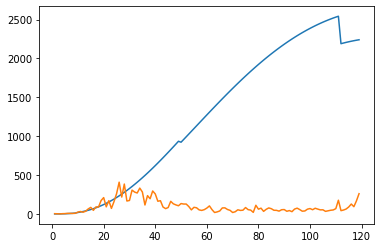

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:23
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept          

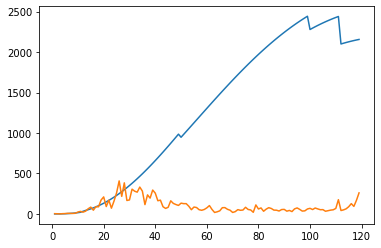

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:23
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept      

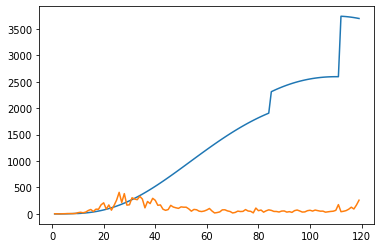

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:23
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Int

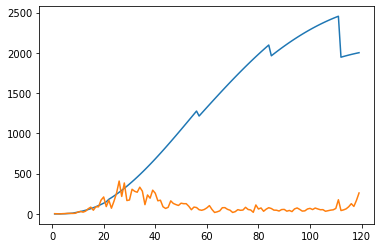

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:23
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept  

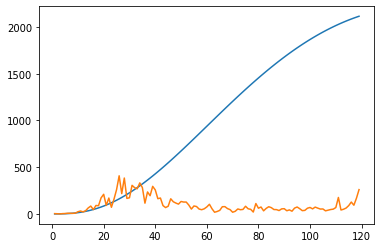

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:23
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Interce

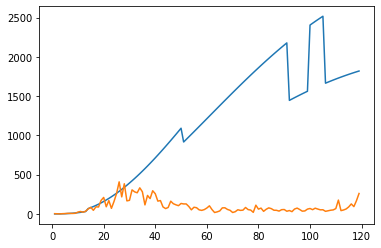

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:23
                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

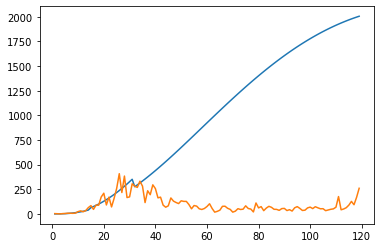

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:24
                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

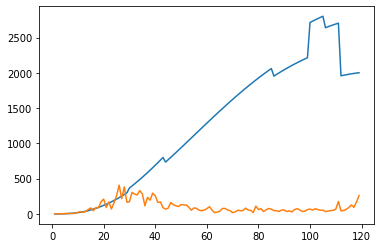

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:24
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.26

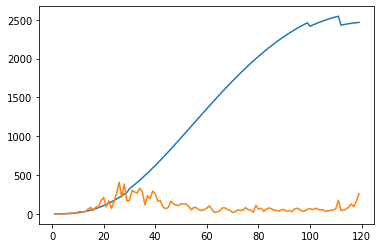

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:24
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept      

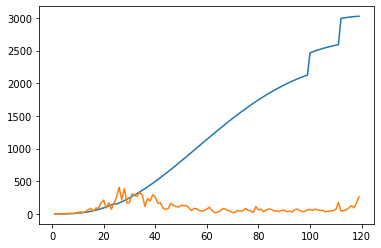

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:24
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4

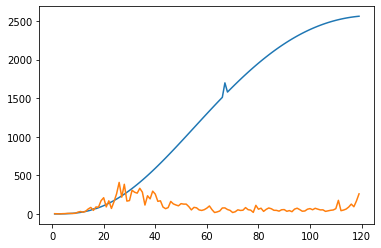

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:24
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept  

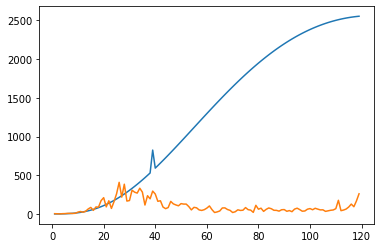

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:24
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

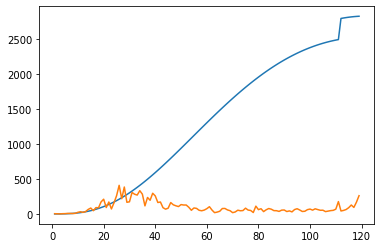

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:25
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.59

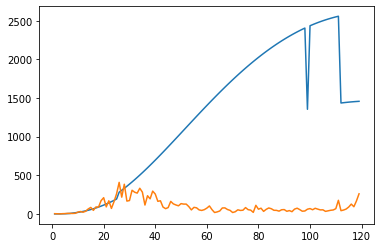

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     3
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:25
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4

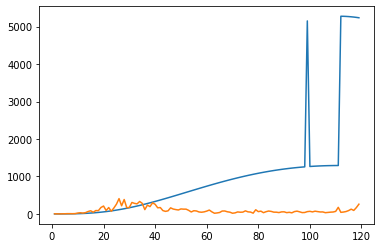

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:25
                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

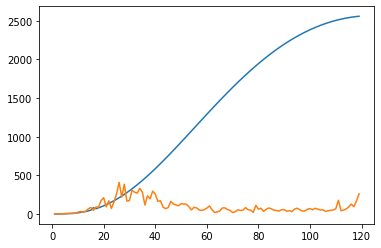

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:38:25
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept  

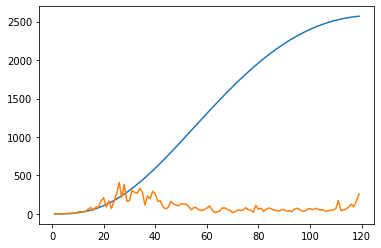

In [562]:
simple_marker_result = pd.DataFrame.from_dict(variable_dict).transpose().sort_values(by=['pval'])
simple_marker_result.to_csv('simple_marker_with_days_log_GEE_result.csv',)
simple_marker_result

,coef,pval
H3_Contacttracing,-0.031698,0.026430
E2_Debtcontractrelief,-0.028157,0.033452
C3_Cancelpublicevents,-0.034428,0.041177
E3_Fiscalmeasures,-0.025702,0.042808
H5_Investmentinvaccines,-0.025718,0.043156
H4_Emergencyinvestmentinhealthcare,-0.025721,0.043469
E4_Internationalsupport,-0.025611,0.045200
E1_Incomesupport,-0.025201,0.057421
C5_Closepublictransport,-0.020245,0.086978
H1_Publicinformationcampaigns,-0.026689,0.094348


Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                 5300
Model:                                 GEE   No. clusters:                       40
Method:                        Generalized   Min. cluster size:                 105
                      Estimating Equations   Max. cluster size:                 180
Family:                            Poisson   Mean cluster size:               132.5
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         21:25:51
                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

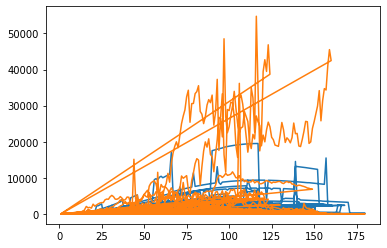

In [527]:
fam = sm.families.Poisson()
ind = sm.cov_struct.Independence()

variable_dict = {}

# for variable in variables:
#     sub_data = data.loc[:,['DailyConfirmed', 'Days', 'CountryCode', variable]]
data = data.fillna(0)
data['logDays'] = np.log(data['Days'])
print("Removing rows by NA value")
print("No. of removed rows:", len(data['Days'])-len(data['Days']))
try:
    mod = smf.gee("DailyConfirmed ~  Days + logDays + "+ ' + '.join(variables[:4]) + ' + ' + ' + '.join(variables[5:]) , "CountryCode", data , cov_struct = ind, family = fam)
    res = mod.fit()
#         country_code = list(set(data['CountryCode']))

    pval = res.pvalues[1]
    coef = res.params[1]
    variable_dict[variable] = {'coef':coef, 'pval':pval, 'no.of countries':len(country_code)}
    print(res.summary())
#         for country in country_code[:1] :
    predict_country = data
    predicted = res.predict(predict_country)
    plt.plot(predict_country['Days'], predicted, '-')
    plt.plot(predict_country['Days'], predict_country['DailyConfirmed'], '-')
    plt.show()
except Exception as e:
    print(e)
    print("Failed to fit the model using", variable)

Removing rows by NA value
No. of removed rows: 0
                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                  161
Model:                                 GEE   No. clusters:                        1
Method:                        Generalized   Min. cluster size:                 161
                      Estimating Equations   Max. cluster size:                 161
Family:                            Poisson   Mean cluster size:               161.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 02 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         02:42:49
                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

/home/twgoo/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_estimating_equations.py:1852: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_robust))
/home/twgoo/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/twgoo/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/twgoo/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


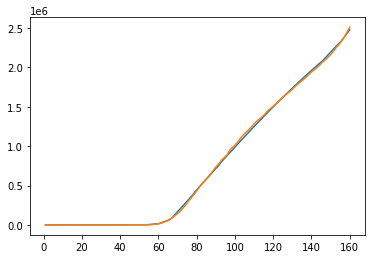

In [429]:
fam = sm.families.Poisson()
ind = sm.cov_struct.Independence()

variable_dict = {}

# for variable in variables:
#     sub_data = data.loc[:,['DailyConfirmed', 'Days', 'CountryCode', variable]]
data = data.fillna(0)
data['logDays'] = np.log(data['Days'])
print("Removing rows by NA value")
print("No. of removed rows:", len(data['Days'])-len(data['Days']))
try:
    mod = smf.gee("DailyConfirmed ~  Days + logDays + "+ ' + '.join(variables[:4]) + ' + ' + ' + '.join(variables[5:]) , "CountryCode", data , cov_struct = ind, family = fam)
    res = mod.fit()
#         country_code = list(set(data['CountryCode']))

    pval = res.pvalues[1]
    coef = res.params[1]
    variable_dict[variable] = {'coef':coef, 'pval':pval, 'no.of countries':len(country_code)}
    print(res.summary())
#         for country in country_code[:1] :
    predict_country = data
    predicted = res.predict(predict_country)
    cumulative = np.cumsum(predicted)
    plt.plot(predict_country['Days'][:-1], cumulative[:-1], '-')
    plt.plot(predict_country['Days'][:-1], predict_country['ConfirmedCases'][:-1], '-')
    plt.show()
except Exception as e:
    print(e)
    print("Failed to fit the model using", variable)

,coef,pval,no.of countries
H3_Contacttracing,-0.031698,0.026430,40.0
E2_Debtcontractrelief,-0.028157,0.033452,40.0
C3_Cancelpublicevents,-0.034428,0.041177,40.0
E3_Fiscalmeasures,-0.025702,0.042808,40.0
H5_Investmentinvaccines,-0.025718,0.043156,40.0
H4_Emergencyinvestmentinhealthcare,-0.025721,0.043469,40.0
E4_Internationalsupport,-0.025611,0.045200,40.0
E1_Incomesupport,-0.025201,0.057421,40.0
C5_Closepublictransport,-0.020245,0.086978,40.0
H1_Publicinformationcampaigns,-0.026689,0.094348,40.0


                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                  458
Model:                                 GEE   No. clusters:                        3
Method:                        Generalized   Min. cluster size:                 150
                      Estimating Equations   Max. cluster size:                 157
Family:                            Poisson   Mean cluster size:               152.7
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Wed, 01 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         15:24:42
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -8.3165     

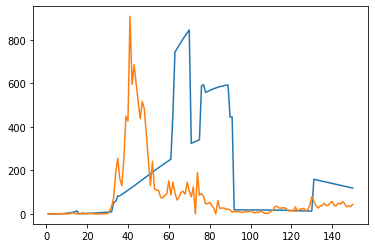

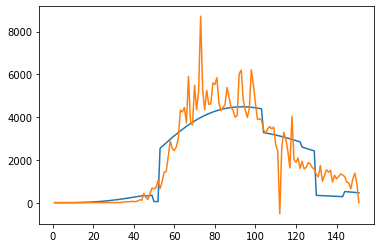

In [97]:
korea_dat = total_dat[total_dat['CountryCode']=='GBR']
predicted = res.predict(korea_dat)

plt.plot(korea_dat['Days'], predicted, '-')
plt.plot(korea_dat['Days'], korea_dat['DailyConfirmed'], '-')

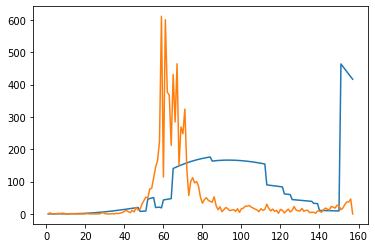

In [99]:
korea_dat = total_dat[total_dat['CountryCode']=='AUS']
predicted = res.predict(korea_dat)

plt.plot(korea_dat['Days'], predicted, '-')
plt.plot(korea_dat['Days'], korea_dat['DailyConfirmed'], '-')

In [102]:
mod = smf.gee("DailyConfirmed ~  Days + logDays + C1_Schoolclosing + C2_Workplaceclosing + C4_Restrictionsongatherings + C6_Stayathomerequirements + C8_Internationaltravelcontrols", "CountryCode", korea_dat , cov_struct = ind, family = fam)

In [103]:
res = mod.fit()
print(res.summary())

                               GEE Regression Results                              
Dep. Variable:              DailyConfirmed   No. Observations:                  150
Model:                                 GEE   No. clusters:                        1
Method:                        Generalized   Min. cluster size:                 150
                      Estimating Equations   Max. cluster size:                 150
Family:                            Poisson   Mean cluster size:               150.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Wed, 01 Jul 2020   Scale:                           1.000
Covariance type:                    robust   Time:                         15:09:26
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          2.0905   2.

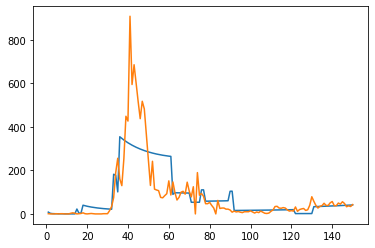

In [104]:
predicted = res.predict(korea_dat)
plt.plot(korea_dat['Days'], predicted, '-')
plt.plot(korea_dat['Days'], korea_dat['DailyConfirmed'], '-')